# HUBBLE IMAGES CLASSIFICATION


Importing the necessary libraries

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import numpy as np
import os
import io
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
os.listdir('/content/drive/MyDrive/Hubble images/train')

['galaxy', 'solar_system', 'nebula']

In [ ]:
os.listdir('/content/drive/MyDrive/Hubble images/test')

['nebula', 'galaxy', 'solar_system']

In [ ]:
datapath = ('/content/drive/MyDrive/Hubble images/train')

In [ ]:
Image.MAX_IMAGE_PIXELS = None

Loading Traindata

In [ ]:
X_train=[]
y_train=[]
Categories=['galaxy', 'solar_system', 'nebula']
for dir in Categories:
  dirpath = os.path.join(datapath,dir)
  # print(dirpath)
  images=os.listdir(dirpath)
  # print(images)
  for img in images:
    imgpath = os.path.join(dirpath,img)
    # print(imgpath)
    img_arr=imread(imgpath)
    img_resize=resize(img_arr,(150,150,1))
    X_train.append(img_resize)
    y_train.append(Categories.index(dir))

In [ ]:
datapath_test = ('/content/drive/MyDrive/Hubble images/test')

Loading TestData

In [ ]:
X_test=[]
y_test=[]
Categories=['galaxy', 'solar_system', 'nebula']
for i in Categories:
  dirpath_test = os.path.join(datapath_test,i)
  image=os.listdir(dirpath_test)
  for j in image:
    imgepath = os.path.join(dirpath_test,j)
    img_array=imread(imgepath)
    imge_resize=resize(img_array,(150,150,1))
    X_test.append(imge_resize)
    y_test.append(Categories.index(i))

Converting list to array

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(667, 150, 150, 1)

In [ ]:
X_test.shape

(237, 150, 150, 1)

Implementing CNN model

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))

Compiling the model

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Training the CNN model

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=16)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.4542 - loss: 2.6370
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6974 - loss: 0.7032
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7646 - loss: 0.6057
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8297 - loss: 0.4776
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8826 - loss: 0.3789
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9028 - loss: 0.3353
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9324 - loss: 0.2426
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9563 - loss: 0.1936
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9706 - loss: 0.1323
Epoch 10/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9775 - loss: 0.1167
Epoch 11/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9747 - loss: 0.1052
Epoch 12/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9777 - l

Checking the accuracy of test data

In [ ]:
model.save('hubble_cnn_1.h5')

In [ ]:
model.evaluate(X_test,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.6535 - loss: 1.4795


[1.2451387643814087, 0.6624472737312317]

Predicting a new image

In [ ]:
imgpath = '/content/drive/MyDrive/Hubble images/test/galaxy/image12.jpg'

array([[[ 8, 15, 23],
        [ 8, 15, 23],
        [ 8, 15, 23],
        ...,
        [11, 15, 24],
        [10, 14, 23],
        [10, 14, 23]],

       [[ 8, 15, 23],
        [ 8, 15, 23],
        [ 8, 15, 23],
        ...,
        [11, 15, 24],
        [12, 16, 25],
        [12, 16, 25]],

       [[ 8, 15, 23],
        [ 8, 15, 23],
        [ 8, 15, 23],
        ...,
        [11, 15, 24],
        [13, 17, 26],
        [13, 17, 26]],

       ...,

       [[ 5, 12, 20],
        [ 5, 12, 20],
        [ 5, 12, 20],
        ...,
        [16, 16, 24],
        [17, 17, 25],
        [17, 17, 25]],

       [[55, 60, 66],
        [ 4,  9, 15],
        [ 3,  8, 14],
        ...,
        [16, 17, 22],
        [15, 16, 21],
        [62, 63, 68]],

       [[55, 60, 66],
        [ 4,  9, 15],
        [ 3,  8, 14],
        ...,
        [16, 17, 22],
        [15, 16, 21],
        [62, 63, 68]]], dtype=uint8)
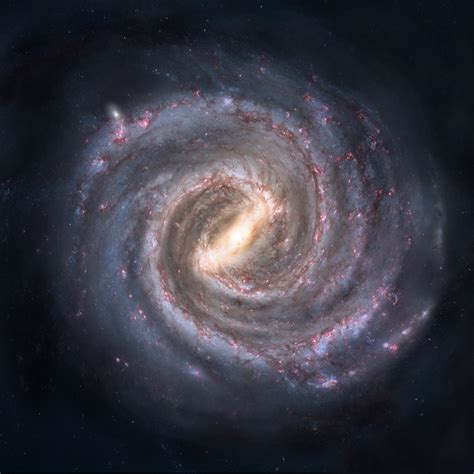

In [ ]:
image = imread(imgpath)
image

In [ ]:
image = resize(image,(150,150,1))

In [ ]:
image = image.reshape(1,150,150,1)

In [ ]:
y_pred=model.predict(image)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


array([[0.8069146 , 0.01064063, 0.18244474]], dtype=float32)

In [ ]:
y_new=np.argmax(y_pred,axis=1)

In [ ]:
Categories[y_new.item()]

'galaxy'

In [ ]:
model.save('hubble_cnn.h5')